# String formatting, String functions, error-handling, File Input/Output, Debugging

<sub>Acknowledgement: Some parts of this notebook was provided by Hyun Min Kang, an Associate Professor of BioStatistics at the School of Public Health, University of Michigan, Ann Arbor.</sub>

## **String formatting**

### Basic examples of printf-style formatting

* Usage: `format % values`
* format: a format string that contains conversion specifiers
* values: one of the following
  - One value
  - Tuple
  - A mapping object (e.g., a dict object)


In [ ]:
ans = 42
key = 'Answer'
s1 = 'The %s is %d.' % (key,ans) # Basic usage
print(s1)
print('%d' % ans)    # print integer
print('%10d' % ans)  # right-aligned 10 digits
print('%010d' % ans) # right-align, filled with zeros
print('%-10d' % ans) # left-aligned 10 digits

### Aligning numbers for neat presentation

* `%3d` right aligns multi-digit numbers (up to 3 digits)

In [ ]:
for i in range(10):
  print('2 ** %d = %3d' % (i, 2 ** i)) # %3d to right-align

### More on printf-style formatting

* Must start with `%`
* `-` for left-justify, `0` for 0-padding
* First number specifies the minimum field width
* Second number (after `.`) specifies the decimal precision
* `d` for integer, `s` for string, `f` for decimal notation, `e` for scientific notation, `g` for smart choice
* `(key)` can be used if dictionary was specified. 

In [1]:
ans = 42
pi = 3.141592653589793
print('%f' % pi)    # use default precision - 6 digits
print('%.2f' % pi)  # use 2 digits after decimal point
print('%.10f' % pi) # use 10 digits after decimal point
print('%10.2f' % pi) # 10 digits total, 2 after decimal point
print('%g, %g, %g' % (ans, pi, 1000000000)) # test flexible format
print('%(name)s: %(avg)e' % {'name':'Alice', 'avg':99.9}) # use mapping key

3.141593
3.14
3.1415926536
      3.14
42, 3.14159, 1e+09
Alice: 9.990000e+01


### Basic examples of format()

* `format()` can be used to format strings with multiple variables.

In [ ]:
d = 42
f = 3.14
s = 'apple'
print('{} {} {}'.format(d, f, s))    # default order
print('{2} {0} {1}'.format(d, f, s)) # reorder
print('{0} is {0}'.format(s))        # repeat
print('{a} {b} {c}'.format(a=6,b=1.618,c='grape')) # keyword argument
print('{0:d} {0:f} {0:g}'.format(42)) # with diffent formatting

### More examples of format()

* printf-style format specification can be used after `:`
* In addition, left/center/right align is also supported.

In [ ]:
print('0123456789' * 2)
print('{:10d}'.format(42))  # %10d in printf-style
print('{:>10d}'.format(42)) # right-align
print('{:<10d}'.format(42)) # left-align
print('{:^10d}'.format(42)) # center-align
print('{:10.2f}'.format(3.141592635)) # %10.2f in printf-style
print('{:5.5f}'.format(3.141592635))  # %5.5f in printf-style

### Formatted string literals

* String represented as `f'...'`
* Variables can be included with `{}`
* Detailed specification after `:`
* Variable names can be used in the detailed specification.
* Function of variables can also be used in the specification.

In [ ]:
pi = 3.14159265
width = 10
precision = 2
print('0123456789' * 2)
print(f'{pi}')        # print the value of pi
print(f'{pi:10.2f}')  # %10.2f in printf-style
print(f'{pi:{width}.{precision}f}') # variables can be used
print(f'{max(width,precision)}')    # functions can be used too
t = [42,1024,23]
for i in range(len(t)):
  print(f'{i}: {t[i]}')  # print multiple values

## **Functions on string**

### String justification

* Additional whitespaces can be added to justify strings.
* Specified character can be used for padding instead of whitespace.

In [ ]:
s = 'abc'
print(s.ljust(5))
print(s.rjust(5))
print(s.center(5))
print(s.ljust(5,'*'))
print(s.rjust(5,'-'))
print(s.center(5,'.'))
print(s)

### strip, lstrip, rstrip functions

* Leading and/or trailing whitespaces can be stripped off.

In [ ]:
s0 = '  a string  '   # string with whitespace
s1 = s0.strip()       # remove whitespace in both sides
s2 = s0.lstrip()      # remove whitespace in left side
s3 = s0.rstrip()      # remove whitespace in right side
print('0123456789'*2)
print('**%s**'%s0)
print('**%s**'%s1)
print('**%s**'%s2)
print('**%s**'%s3)

### join() function

* `join()` function combines a list of strings into a single string with a specified delimiter.

In [ ]:
print('.'.join('abc'))
print('.'.join(['foo','bar']))
print('*-*'.join(['foo','bar']))
print('\n'.join(['foo','bar']))

### Example of split() function

* `split()` performs an opposite task to `join()`. It splits a single string by a delimiter.

In [ ]:
colors = 'red,green,blue'
tokens = colors.split(',')
print(tokens)
print('hello world'.split())      # split by whitespace
print('a,,b,c'.split(','))        # split by ','. Note how ,, are handled
print('h e  l  l\to'.split())     # whitespaces are robustly handled
print('abracadabra'.split('a'))   # split by 'a'
print('abracadabra'.split('a',2)) # split only two tokens
print('abracadabra'.split('ra'))  # split by 'ra'

### Examples of splitline() function

* A multi-line string can be split by lines using `.splitline() function`

In [ ]:
text = '''First, solve the problem. Then, write the code. - John Johnson
Talk is cheap. Show me the code. - Linus Torvalds
Good design adds value faster than it adds cost. - Thomas C. Gale
Computers are good at following instructions, but not at reading your mind. - Donald Knuth'''
lines = text.splitlines()
for i,line in enumerate(lines):
  print('line %d : %s' % (i, line))

### Examples of find(), rfind(), count() functions

* These functions enables finding a substring within a string 

In [ ]:
s = 'A horse is a horse, of course, of course'
print(s.find('rse'))         # where does 'rse' occur first?
print(s.find('rse', 10))     # occurrence after index 10
print(s.rfind('rse'))        # find occurrence backwards
print(s.rfind('rse', 0, 10)) # find backwards within first 10 characters
print(s.find('mule'))        # what if the string is not found?
print(s.count('rse'))        # how many rse are seen?
print(s.count('rse', 10))    # count occurrences from index 10
print(s.count('rse', 10, 20))# count from index 10 to 20

## **Accessing text files**

### Reading a text file

* `open()` function opens a file handle.
* `.read()` function reads the file.
* `.close()` function closes the file handle.

In [ ]:
fileobj = open('/etc/hosts','r')  # open the file in read ('r') mode
file_contents = fileobj.read()    # read the file
print(file_contents)              # print the contents
fileobj.close()                   # close the file

### Alternative way to open a file

* `with open ... as` can be alternatively used to open a file.

In [ ]:
with open('/etc/hosts','r') as fileobj:
  file_contents = fileobj.read()

### Reading file by lines

* `for str in filehandle:` block can be used to read a file line by line

In [ ]:
with open('/etc/hosts','r') as fileobj:
  for line in fileobj:
    tokens = line.split()
    print("Address =",tokens[0], "\tName=",tokens[1])

### Writing a file

* `print(..., file=filehandle)` can be used to write to a file

In [ ]:
with open('/tmp/test.txt','wt') as fileobj:
  print("Hello, world!", file=fileobj)

In [ ]:
# print the content of the file using a UNIX command
!cat /tmp/test.txt

## **Error Handling**

### Example : Syntax Error

* Syntax error is typically thrown when python encounters them 

In [ ]:
while True
  number = input('Enter a number')
  print('If I double the number, it is ', number * 2)

### Example : Semantic Error

* Semantic error does not violate syntax, but gives misleading results.

In [ ]:
number = input('Enter a number: ')
print('If I double the number, it is ', number * 2)

### Example : Exception

* Exception can be thrown from a function when encountering unexpected input.

In [ ]:
number = int(input('Enter a number: '))
print('If I double the number, it is ', number * 2)

### Example of exception handling

* When exception is thrown, it can be caught without throwing an error using `try ... except ...`

In [ ]:
try:
  number = int(input('Enter a number: '))
  print('If I double the number, it is ', number * 2)
except:
  print('Please enter an integer number!!')

### Argument for exceptions

* The type of exception can be identified.

In [ ]:
try:
  a = 3 / 0
except Exception as err:
  print(type(err))
  print(err)
  print(err.args)

### Error handling examples - without raising exceptions

* Existing exception can be caught without breaking the program.

In [ ]:
while True:
  try:
    number = int(input('Enter a positive integer number: '))
    if number <= 0:
      print('Please enter a positive integer number!!!')
      continue
    break
  except:
    print('Please enter a positive integer number!!!')

### Error handling examples - with raising exceptions

* A new exception can be thrown upon certain unexpected behavior.

In [ ]:
while True:
  try:
    number = int(input('Enter a positive integer number: '))
    if number <= 0:
      raise ValueError
    break
  except:
    print('Please enter a positive integer number!!!')

### Error handling examples - opening a file

* A specific type of exception can be caught.

In [ ]:
filepath = input('Enter the full path of a file: ')
try:
  f = open(filepath, 'r')
  lineno = 0
  for line in f:
    lineno += 1
    print("Line", lineno, ":", line,end='')
  f.close()
except OSError as err:
  print("Could not read the file",filepath)

## **Debugging in python**

#### **Method 0: using `print()`**

Use `print()` function to check suspicious variables and print messages. It is the most basic method but still useful in many situations. 

In [ ]:
def buggy_function(n):
    k=0
    for i in range(n):
        print(n, k)           # Check the varialbe with print()
        if k==0:
            print('k is zero! Check why!')
        n = n/k
    return n

buggy_function(10)

**You cannot mix these methods**

#### **Method 1: using `breakpoint()`**
`breakpoint()`: Execution stops where this is called, and the debuggin mode begins. Internally, it calls `import pdb; pdb.set_trace()`. It is ignored if the environment variable `PYTHONBREAKPOINT` is set to `'0'`.

**Command list**<br>
`c`: continue<br>
`n`: run the next statement (does not step into a function)<br>
`s`: step (steps into a function)<br>
`b line_number`: set a break point at the line_number<br>
`b function`: set a break point at the first line of `function`<br>
`disable idx`: clear a break point with an index `idx`<br>
`b`: lists all breakpoints<br>
`u`: move up in the stack trace<br>
`d`: move down in the stack trace<br>
`q`: quit<br>
`h`: help<br>

In [ ]:
import os
#os.environ['PYTHONBREAKPOINT']='0' # disables breakpoint()
os.environ['PYTHONBREAKPOINT']=''  # enables breakpoint()

def buggy_function(n):
    for i in range(n):
        breakpoint()           # The kernal enters debugging mode
        n = n/0
    return n

buggy_function(10)

#### **Method 2: using IPython.core.debugger**

Import `from IPython.core.debugger import set_trace` and use `set_trace()`.  It behaves almost identical to `breakpoint()`, but it gives syntax highlights, which is visually fancier. Note: It is **NOT** controlled by the environment variable `PYTHONBREAKPOINT`.

In [ ]:
from IPython.core.debugger import set_trace

def buggy_function(n):
    for i in range(n):
        set_trace()           # The kernal enters debugging mode
        n = n/0
    return n

buggy_function(10)

#### **Method 3: using `%debug` or `%%debug`**

`%debug` is a magic function of the IPython notebook. You should put it at the beginning of a cell. The kernal will automatically begin bebugging where an error occurs.

`%%debug` is a magic function of the IPython notebook. You should put it at the beginning of a cell. The kernal will immediately start debugging mode at the beginning of the cell execution.


In [ ]:
%debug 
# You can't add comment on the same line of this magic function.

def buggy_function(n):
    for i in range(n):
        n = n/0      # error. Kernal starts debugging
    return n

buggy_function(10)

In [ ]:
%%debug 
# You can't add comment on the same line of this magic function.

def buggy_function(n):
    for i in range(n):
        n = n/0
    return n

buggy_function(10)  # The kernal starts debugging in the first line.

#### **Method 4: using a website: [Pythontutor.com](http://www.pythontutor.com/visualize.html#mode=edit)**

This site graphically shows the value and the structure of variables and how functions are called.

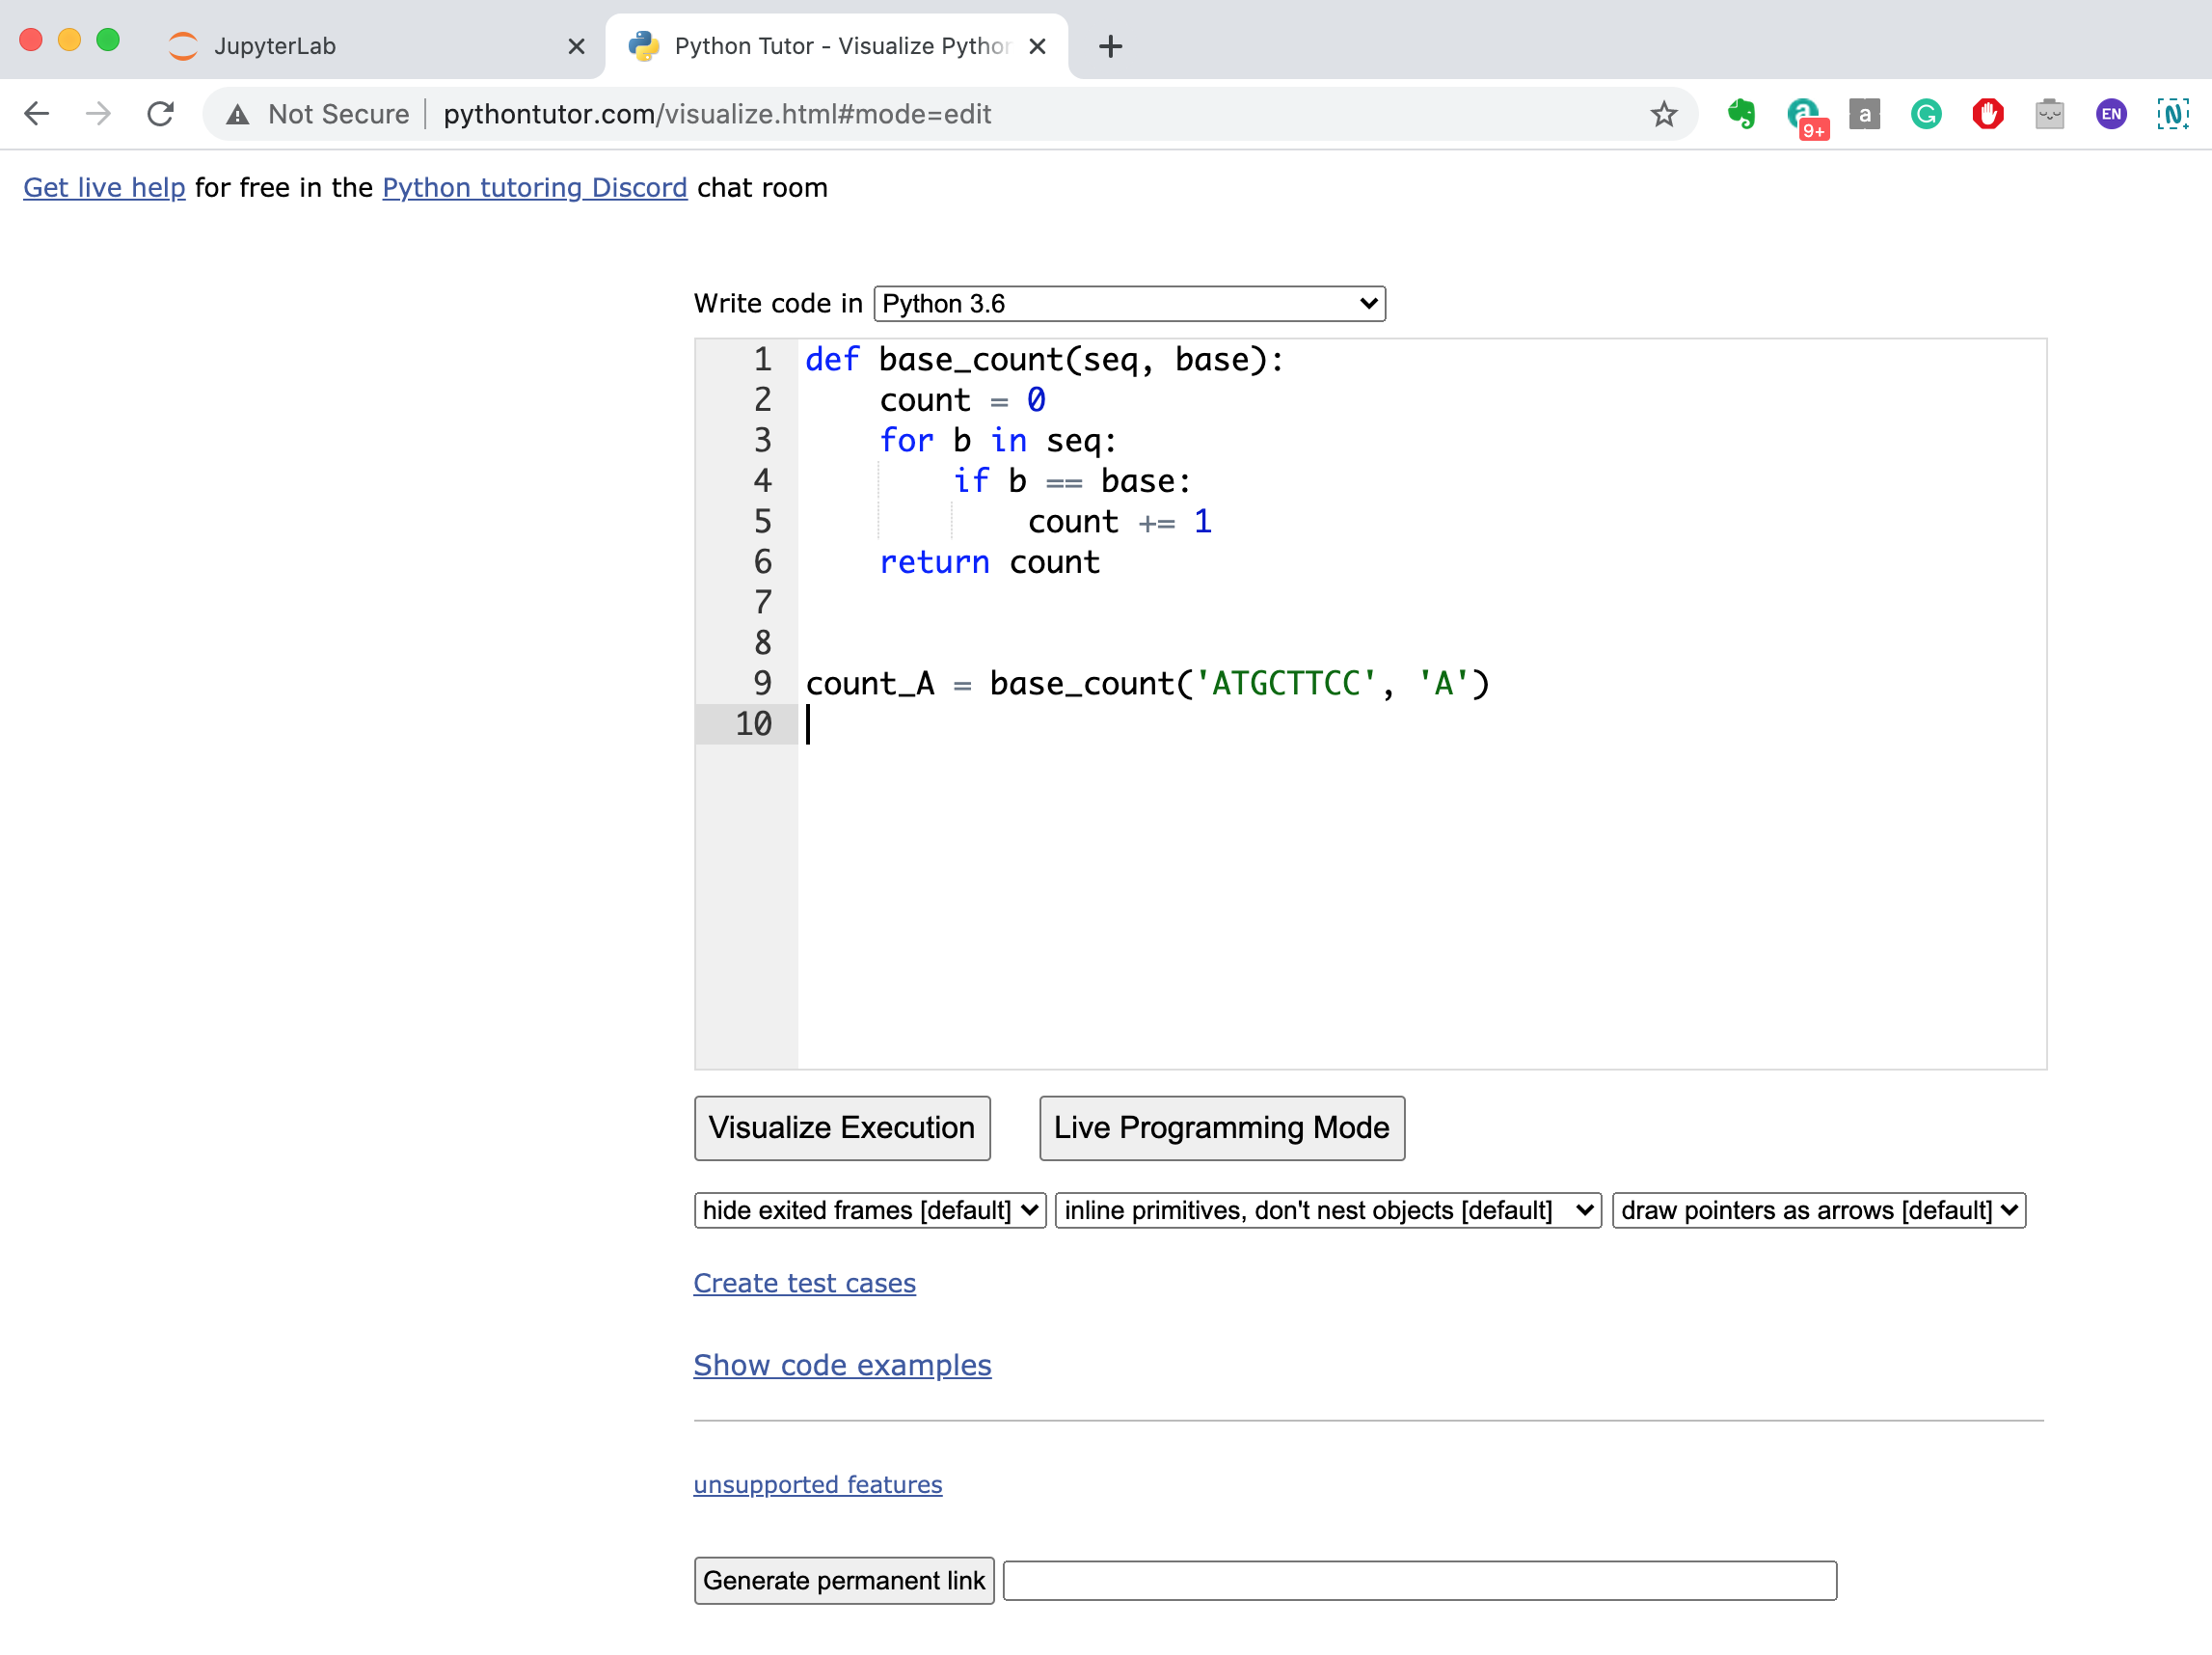